# Exercise: digits clustering


## Task
* Apply K-means and agglomerative clustering (DBSCAN is optional) to digits dataset
* Visualize the cluster centers as images (i.e. reshape each to 8x8 and use plt.imshow) Do the clusters seem to be correlated with particular digits? What is the adjusted_rand_score?
* Visualize clustering using t-SNE (http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* Compare algorithms from #1 using clustering metrics (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster). Play with metrics.silhouette_score, metrics.adjusted_rand_score and metrics.homogeneity_completeness_v_measure.

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [89]:
from sklearn.datasets import load_digits

np.random.seed(42)

digits = load_digits()

X = digits.images.reshape((n_samples, -1))#
#X = scale(digits.data) #data
y = digits.target

n_samples, n_features = X.shape
n_digits = len(np.unique(y))

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


### KMeans

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_digits)
labels = kmeans.fit_predict(X) #Compute cluster centers and predict cluster index for each sample.
print (labels)

[0 5 5 ..., 5 1 1]


In [91]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score # ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure

def bench_k_means(estimator, name, data):
    estimator.fit(X)
    print('KMeans')
    print(name)
    print('Estimated number of clusters: %d' % n_digits)
    print('adjusted_rand_score:%f' % metrics.adjusted_rand_score(labels, estimator.labels_))
    print('silhouette_score:%f' % metrics.silhouette_score(X, estimator.labels_,metric='euclidean'))
    print("Homogeneity: %0.3f   %0.3f   %0.3f" %  metrics.homogeneity_completeness_v_measure(labels, estimator.labels_))
    print('') 

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),name="random",data=X)

KMeans
random
Estimated number of clusters: 10
adjusted_rand_score:0.891925
silhouette_score:0.179533
Homogeneity: 0.920   0.919   0.920



In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('')
print('Accuracy score:', accuracy_score(y, labels))
print('')
print(confusion_matrix(y, labels))


('Accuracy score:', 0.18697829716193656)

[[177   0   0   0   0   0   1   0   0   0]
 [  0   0  24  54   2 100   0   1   0   1]
 [  1   2 148   3   0   8   0   0   2  13]
 [  0  12   0   0   0   7   0   2   6 156]
 [  0   0   0   2   0   2 166   0  11   0]
 [  0  41   0   0   1   0   2 136   0   2]
 [  1   0   0   0 177   3   0   0   0   0]
 [  0   0   0  10   0   2   0   0 167   0]
 [  0  50   3   9   2 100   0   4   4   2]
 [  0 139   0  20   0   1   0   5   8   7]]


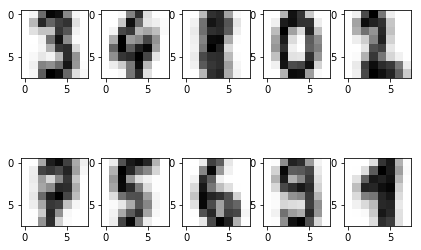

In [93]:
#centroids for kmean
centroids=kmeans.fit(X).cluster_centers_

index=0
f = plt.figure(figsize=(7, 5))
for image in centroids:
    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image.reshape(8,8), cmap=plt.cm.gray_r)
    index=index+1
plt.show()

### TSNE

In [94]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

In [95]:
# Scale and visualize the embedding vectors
def plot_embedding(X, y,title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i]/10. ),
                 fontdict={'weight': 'bold', 'size': 9})
           
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

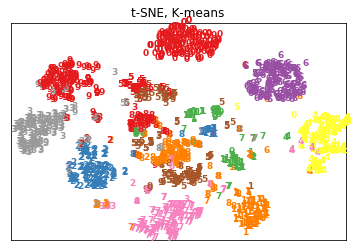

In [96]:
# t-SNE embedding of the digits dataset
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)

plot_embedding(X_tsne,labels, "t-SNE, K-means")

plt.show()

### Agglomerative Clustering

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
agcl = AgglomerativeClustering(n_clusters=n_digits)
labels_agcl = agcl.fit_predict(X) #Compute cluster centers and predict cluster index for each sample.
print (labels_agcl)

[7 9 4 ..., 4 1 4]


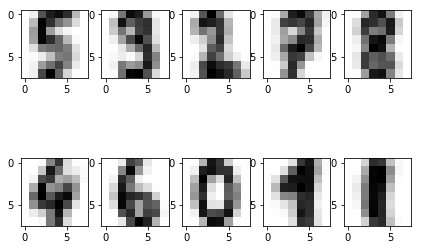

In [99]:
#centroids for agcl

f = plt.figure(figsize=(7, 5))
for i in range(10):
    centroids_agcl=np.mean(X[labels_agcl==i],axis=0)
    sub = f.add_subplot(2, 5, i + 1)
    sub.imshow(centroids_agcl.reshape(8,8), cmap=plt.cm.gray_r)
plt.show()


In [100]:
def bench_agcl(estimator, name, data):
    estimator.fit(X)
    print('AgglomerativeClustering')
    print(name)
    print('Estimated number of clusters: %d' % n_digits)
    print('adjusted_rand_score:%f' % metrics.adjusted_rand_score(labels, estimator.labels_))
    print('silhouette_score:%f' % metrics.silhouette_score(X, estimator.labels_,metric='euclidean'))
    print("Homogeneity: %0.3f   %0.3f   %0.3f" %  metrics.homogeneity_completeness_v_measure(labels, estimator.labels_))
    
bench_agcl(AgglomerativeClustering(n_clusters=n_digits),name="random",data=X)

AgglomerativeClustering
random
Estimated number of clusters: 10
adjusted_rand_score:0.697865
silhouette_score:0.178497
Homogeneity: 0.797   0.809   0.803


### Compare algorithms using clustering metrics

In [101]:
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),name="random",data=X)
bench_agcl(AgglomerativeClustering(n_clusters=n_digits),name="random",data=X)

KMeans
random
Estimated number of clusters: 10
adjusted_rand_score:0.971701
silhouette_score:0.182249
Homogeneity: 0.967   0.968   0.968

AgglomerativeClustering
random
Estimated number of clusters: 10
adjusted_rand_score:0.697865
silhouette_score:0.178497
Homogeneity: 0.797   0.809   0.803


### visual comparison

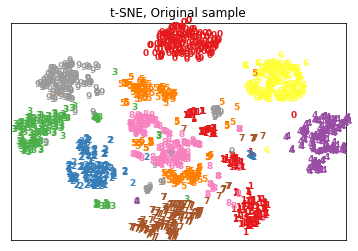

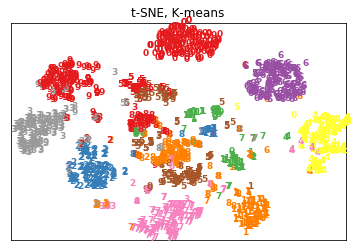

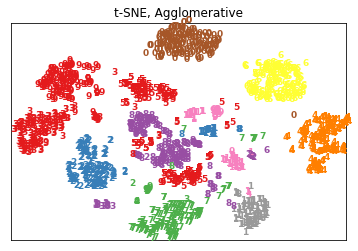

In [102]:
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_embedding(X_tsne, y,"t-SNE, Original sample" )
plot_embedding(X_tsne,labels, "t-SNE, K-means")
plot_embedding(X_tsne,labels_agcl,"t-SNE, Agglomerative" )

plt.show()